# Data Science Environment Starter

Welcome to your new data science workspace! This notebook demonstrates the capabilities of your environment, which is configured with:

- **Pandas** for data manipulation
- **NumPy** for numerical operations
- **Matplotlib** and **Seaborn** for visualization
- **Scikit-learn** for machine learning (available for import)

## 1. Environment Setup
We are running in a dedicated virtual environment configured for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


## 2. Generate Synthetic Data
Let's create some synthetic sales data to analyze. We'll simulate 100 days of sales for 3 different products.

In [2]:
np.random.seed(42)

dates = pd.date_range(start='2024-01-01', periods=100)
products = ['Widget A', 'Widget B', 'Widget C']

data = {
    'Date': np.random.choice(dates, 300),
    'Product': np.random.choice(products, 300),
    'Sales': np.random.normal(loc=100, scale=20, size=300).astype(int),
    'Customer_Count': np.random.randint(10, 50, size=300)
}

df = pd.DataFrame(data)
df['Revenue'] = df['Sales'] * np.random.uniform(10, 20, size=300)

df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Product,Sales,Customer_Count,Revenue
0,2024-01-01,Widget C,139,44,1763.900832
1,2024-01-01,Widget B,119,11,2118.016020
2,2024-01-01,Widget C,48,17,598.609552
3,2024-01-01,Widget A,109,35,1862.875966
4,2024-01-01,Widget A,127,46,2131.080514


## 3. Exploratory Data Analysis (EDA)
Basic statistics and grouping.

In [3]:
# Descriptive statistics
display(df.describe())

# Group by Product to see average performance
product_stats = df.groupby('Product')[['Sales', 'Revenue', 'Customer_Count']].mean()
display(product_stats)

,Date,Sales,Customer_Count,Revenue
count,300,300.000000,300.000000,300.000000
mean,2024-02-18 21:26:24,100.960000,30.423333,1521.031390
min,2024-01-01 00:00:00,30.000000,10.000000,555.362074
25%,2024-01-23 18:00:00,87.000000,20.000000,1170.315794
50%,2024-02-21 00:00:00,102.500000,31.000000,1496.706564
75%,2024-03-15 00:00:00,115.000000,40.000000,1859.914833
max,2024-04-09 00:00:00,163.000000,49.000000,2590.188793
std,NaN,22.294436,11.389022,453.831302


,Sales,Revenue,Customer_Count
Product,,,
Widget A,97.072727,1511.522800,31.127273
Widget B,103.152381,1527.753054,31.161905
Widget C,103.282353,1525.033394,28.600000


## 4. Visualizations
Visualize the data using Matplotlib and Seaborn.

C:\Users\julie\AppData\Local\Temp\ipykernel_3560\2742394947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_stats.index, y='Revenue', data=product_stats, palette='viridis')


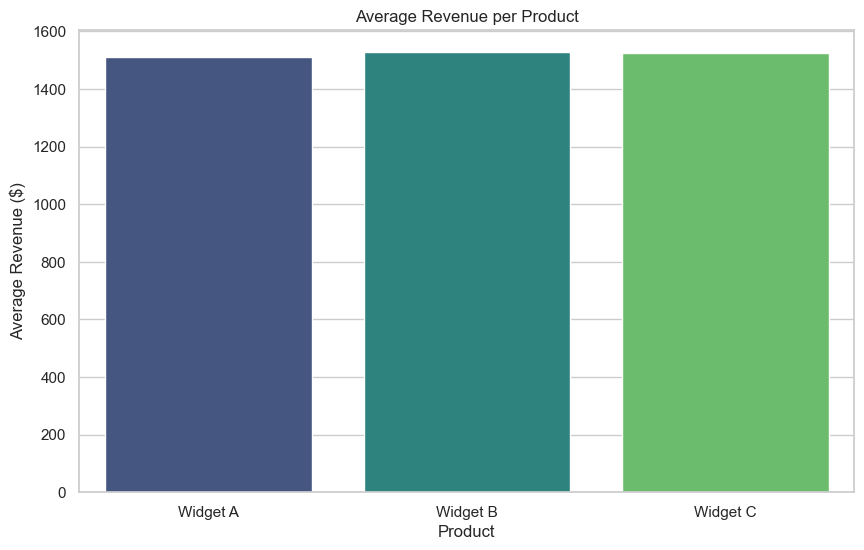

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_stats.index, y='Revenue', data=product_stats, palette='viridis')
plt.title('Average Revenue per Product')
plt.ylabel('Average Revenue ($)')
plt.show()

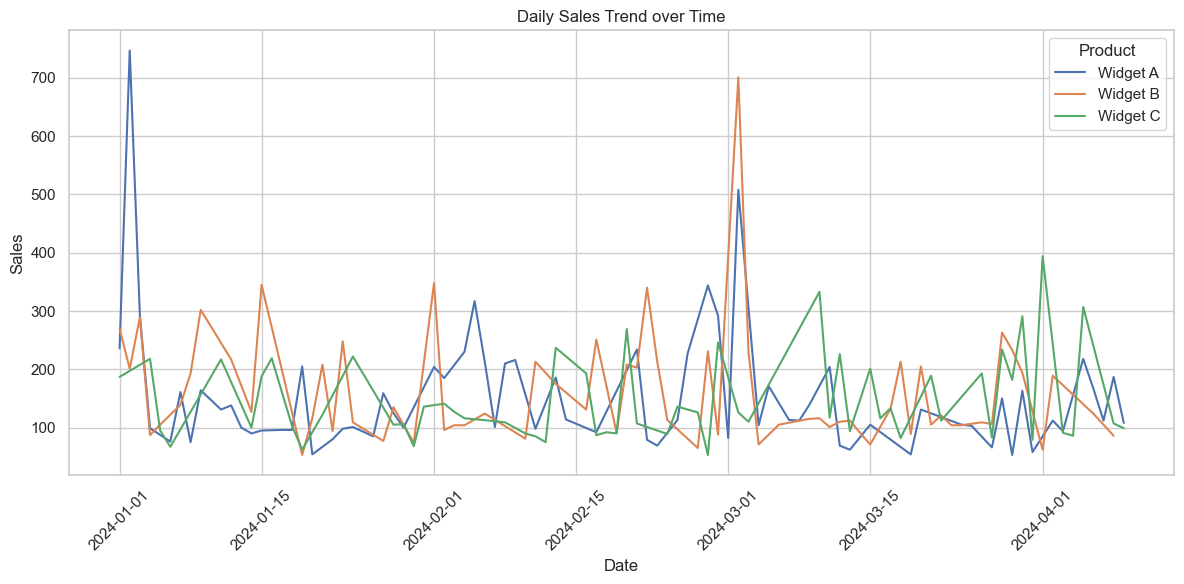

In [5]:
# Daily sales trend for each product
daily_sales = df.groupby(['Date', 'Product'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Product', data=daily_sales)
plt.title('Daily Sales Trend over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Next Steps
You can now extend this notebook or create new ones in this directory. The kernel is already configured to use the libraries installed in `.venv`.